# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [429]:
df= pd.read_csv('Testdata.csv')
df.head()

,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,seller,endDate,sType,Product,price,terminationDate,party,PartyId,transactionType,Reporting Status
0,1,SEBI,1,FX,2023-07-18T11:47:26.075000Z,True,FULLY,False,2023-12-10T07:37:58.548000Z,NonElectronic,...,Party1,2023-05-26T05:23:44.110000Z,Cash,Swap,NaN,2023-07-02T04:01:17.940000Z,PartyZ,1,EXIT,Failed Ack
1,2,SEBI,9,FX,2023-08-02T03:12:48.207000Z,False,FULLY,False,2023-10-03T22:32:10.991000Z,NotConfirmed,...,Party2,2023-07-23T23:43:15.460000Z,Cash,Swap,NaN,2023-08-15T13:25:45.442000Z,PartyX,4,EXIT,ACK
2,3,SEBI,8,FX,2023-05-09T07:42:36.475000Z,False,FULLY,False,2023-03-09T20:32:31.302000Z,NonElectronic,...,Party2,2023-08-08T11:13:43.217000Z,Physical,Swap,NaN,2023-07-07T02:03:20.354000Z,PartyX,4,TRADE,Processing Error
3,4,SEBI,1,FX,2023-10-01T05:02:54.209000Z,False,FULLY,True,2023-11-21T06:53:09.983000Z,Electronic,...,Party2,2023-07-31T19:30:37.266000Z,Cash,forward,91773.25433,2023-08-02T04:55:34.632000Z,PartyK,2,TRADE,Acknowledged
4,5,SEBI,1,FX,2023-01-23T20:53:01.076000Z,True,ONEWAY,False,2023-08-05T17:06:08.895000Z,Electronic,...,Party1,2023-12-04T19:38:57.326000Z,Cash,Swap,NaN,2023-02-08T06:49:44.186000Z,PartyX,4,TRADE,Acknowledged


# Exploratory Data Analysis

In [3]:
df.shape

(50000, 26)

- There are 50000 rows and 26 columns present in the data.

In [4]:
df.columns

Index(['tradeId', 'regulator', 'version', 'assetClass', 'clDateTime',
       'clStatus', 'cflag', 'eFlag', 'cDateTime', 'method', 'rate',
       'expirationDate', 'eventT', 'mType', 'Timestamp', 'quantity', 'seller',
       'endDate', 'sType', 'Product', 'price', 'terminationDate', 'party',
       'PartyId', 'transactionType', 'Reporting Status'],
      dtype='object')

### Basic Information About Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tradeId           50000 non-null  int64  
 1   regulator         50000 non-null  object 
 2   version           50000 non-null  int64  
 3   assetClass        50000 non-null  object 
 4   clDateTime        50000 non-null  object 
 5   clStatus          50000 non-null  bool   
 6   cflag             50000 non-null  object 
 7   eFlag             50000 non-null  bool   
 8   cDateTime         50000 non-null  object 
 9   method            50000 non-null  object 
 10  rate              50000 non-null  float64
 11  expirationDate    50000 non-null  object 
 12  eventT            50000 non-null  object 
 13  mType             50000 non-null  object 
 14  Timestamp         50000 non-null  object 
 15  quantity          50000 non-null  object 
 16  seller            50000 non-null  object

### Statistical Summary

In [59]:
df.describe(include='all')

,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,seller,endDate,sType,Product,price,terminationDate,party,PartyId,transactionType,Reporting Status
count,50000.000000,50000,50000.000000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,15014.000000,43791,50000,50000.000000,50000,50000
unique,NaN,1,NaN,1,50000,2,6,2,50000,8,...,2,50000,2,4,NaN,43791,5,NaN,3,7
top,NaN,SEBI,NaN,FX,2023-07-18T11:47:26.075000Z,True,FULLY,False,2023-12-10T07:37:58.548000Z,Electronic,...,Party2,2023-05-26T05:23:44.110000Z,Physical,Swap,NaN,2023-07-02T04:01:17.940000Z,PartyX,NaN,TRADE,Ignored
freq,NaN,50000,NaN,50000,1,26684,13938,25023,1,10507,...,25217,1,25063,41737,NaN,1,16577,NaN,25633,12878
mean,25000.500000,NaN,4.991940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,502292.898972,NaN,NaN,3.163600,NaN,NaN
std,14433.901067,NaN,2.593339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,288205.734165,NaN,NaN,1.342919,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108.503208,NaN,NaN,1.000000,NaN,NaN
25%,12500.750000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,253646.139675,NaN,NaN,2.000000,NaN,NaN
50%,25000.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,501724.834200,NaN,NaN,3.000000,NaN,NaN
75%,37500.250000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,751081.198725,NaN,NaN,4.000000,NaN,NaN


### Check For Missing Values

In [6]:
df.isnull().sum()

tradeId                 0
regulator               0
version                 0
assetClass              0
clDateTime              0
clStatus                0
cflag                   0
eFlag                   0
cDateTime               0
method                  0
rate                    0
expirationDate          0
eventT                  0
mType                   0
Timestamp               0
quantity                0
seller                  0
endDate                 0
sType                   0
Product                 0
price               34986
terminationDate      6209
party                   0
PartyId                 0
transactionType         0
Reporting Status        0
dtype: int64

- Columns price and terminationDate has missing values

### Percentage of Missing Values

In [7]:
df.isnull().sum()/len(df)*100

tradeId              0.000
regulator            0.000
version              0.000
assetClass           0.000
clDateTime           0.000
clStatus             0.000
cflag                0.000
eFlag                0.000
cDateTime            0.000
method               0.000
rate                 0.000
expirationDate       0.000
eventT               0.000
mType                0.000
Timestamp            0.000
quantity             0.000
seller               0.000
endDate              0.000
sType                0.000
Product              0.000
price               69.972
terminationDate     12.418
party                0.000
PartyId              0.000
transactionType      0.000
Reporting Status     0.000
dtype: float64

- As price column has approximately 70% missing values and highly affecting target variable then we can drop that column.

### Check For Duplicate Data

In [62]:
df.duplicated().sum()

0

- There is no duplicate data

## Data in Proper Format

### Converting into datetime format from object

In [430]:
df['clDateTime']= pd.to_datetime(df['clDateTime'])

In [431]:
df['cDateTime']= pd.to_datetime(df['cDateTime'])

In [432]:
df['expirationDate']= pd.to_datetime(df['expirationDate'])

In [433]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [434]:
df['endDate']= pd.to_datetime(df['endDate'])

In [435]:
df['terminationDate']= pd.to_datetime(df['terminationDate'])

### Extracting Year From DateTime

In [436]:
df['Year']= df['clDateTime'].dt.year

### Extracting Month From DateTime

In [440]:
df['Month']= df['clDateTime'].dt.month

In [441]:
df= df.drop(columns=['clDateTime'])

### clStatus

In [442]:
df['clStatus']= df['clStatus'].replace('False',0)
df['clStatus']= df['clStatus'].replace('True',1)

In [443]:
df['clStatus']= df['clStatus'].astype('int')

### eFlag

In [444]:
df['eFlag']= df['eFlag'].replace('False',0)
df['eFlag']= df['eFlag'].replace('True',1)

In [445]:
df['eFlag']= df['eFlag'].astype('int')

### cflag

In [446]:
df['cflag'].value_counts()

cflag
FULLY               13938
ONEWAY              13902
UNCOLLATERALIZED    13860
F                    2798
UN                   2758
OW                   2744
Name: count, dtype: int64

In [447]:
df['cflag']= df['cflag'].replace('F','FULLY')

In [448]:
df['cflag']= df['cflag'].replace('UN','UNCOLLATERALIZED')
df['cflag']= df['cflag'].replace('OW','ONEWAY')

In [449]:
df['cflag'].value_counts()

cflag
FULLY               16736
ONEWAY              16646
UNCOLLATERALIZED    16618
Name: count, dtype: int64

### method

In [450]:
df['method'].value_counts()

method
Electronic       10507
NonElectronic    10460
Nn-Electronic    10432
NotConfirmed     10301
E                 2141
NC                2065
NE                2064
Non               2030
Name: count, dtype: int64

In [451]:
df['method']= df['method'].replace('E','Electronic')
df['method']= df['method'].replace('NC','NotConfirmed')
df['method']= df['method'].replace('NE','Nn-Electronic')
df['method']= df['method'].replace('Non','NonElectronic')

In [452]:
df['method'].value_counts()

method
Electronic       12648
Nn-Electronic    12496
NonElectronic    12490
NotConfirmed     12366
Name: count, dtype: int64

### mType

In [453]:
df['mType'].value_counts()

mType
Snapshot    20913
Realtime    20787
S            4174
R            4126
Name: count, dtype: int64

In [454]:
df['mType']= df['mType'].replace('S','Snapshot')
df['mType']= df['mType'].replace('R','Realtime')

In [455]:
df['mType'].value_counts()

mType
Snapshot    25087
Realtime    24913
Name: count, dtype: int64

### transactionType

In [456]:
df['transactionType'].value_counts()

transactionType
TRADE    25633
EXIT     24366
Exit         1
Name: count, dtype: int64

In [457]:
df['transactionType']= df['transactionType'].replace('Exit','EXIT')

In [458]:
df['transactionType'].value_counts()

transactionType
TRADE    25633
EXIT     24367
Name: count, dtype: int64

### quantity

In [459]:
df['quantity'].value_counts()

quantity
1       32767
1       17232
asxa        1
Name: count, dtype: int64

In [460]:
df['quantity']= df['quantity'].replace('asxa',1)

In [461]:
df['quantity']= df['quantity'].replace('1',1)

In [462]:
df['quantity'].value_counts()

quantity
1    50000
Name: count, dtype: int64

### Converting Quantity type into Int 

In [463]:
df['quantity']= df['quantity'].astype('int')

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tradeId           50000 non-null  int64              
 1   regulator         50000 non-null  object             
 2   version           50000 non-null  int64              
 3   assetClass        50000 non-null  object             
 4   clStatus          50000 non-null  int32              
 5   cflag             50000 non-null  object             
 6   eFlag             50000 non-null  int32              
 7   cDateTime         50000 non-null  datetime64[ns, UTC]
 8   method            50000 non-null  object             
 9   rate              50000 non-null  float64            
 10  expirationDate    50000 non-null  datetime64[ns, UTC]
 11  eventT            50000 non-null  object             
 12  mType             50000 non-null  object             
 13  T

## Univariate Analysis

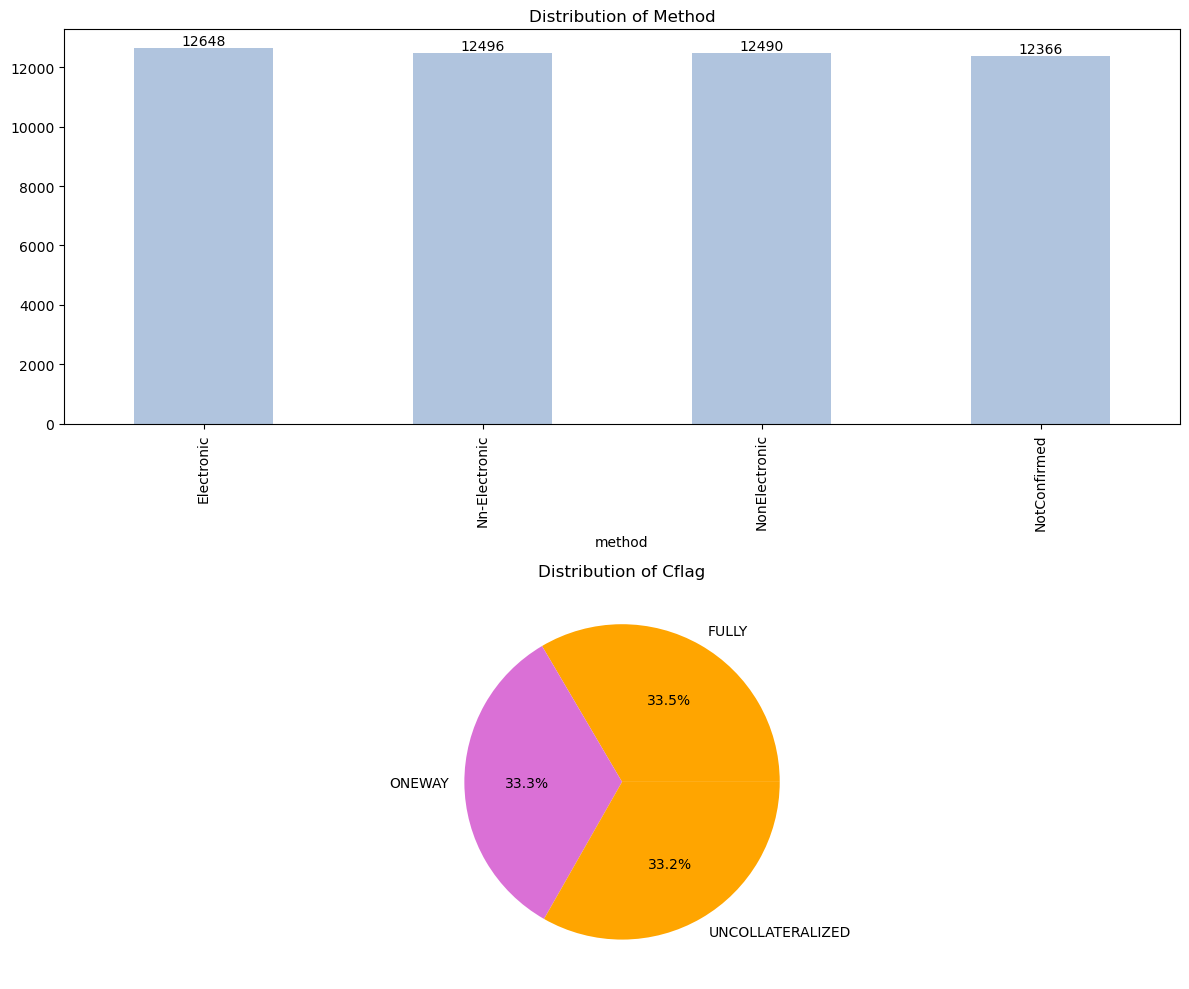

In [211]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))


ax=df['method'].value_counts().plot(kind='bar', ax=axs[0], color='lightsteelblue')
axs[0].set_title('Distribution of Method')
for i in ax.containers:
    ax.bar_label(i)

cflag_counts = df['cflag'].value_counts()
axs[1].pie(cflag_counts, labels=cflag_counts.index, autopct='%1.1f%%', colors=['orange', 'orchid'])
axs[1].set_title('Distribution of Cflag')


fig.tight_layout()


plt.show()

- From above analysis most of the financial transactions were conducted Electronically.
- As we can see from above chart of Clearing Flag Fully had an upperhand which is 33.5% as compared to others.

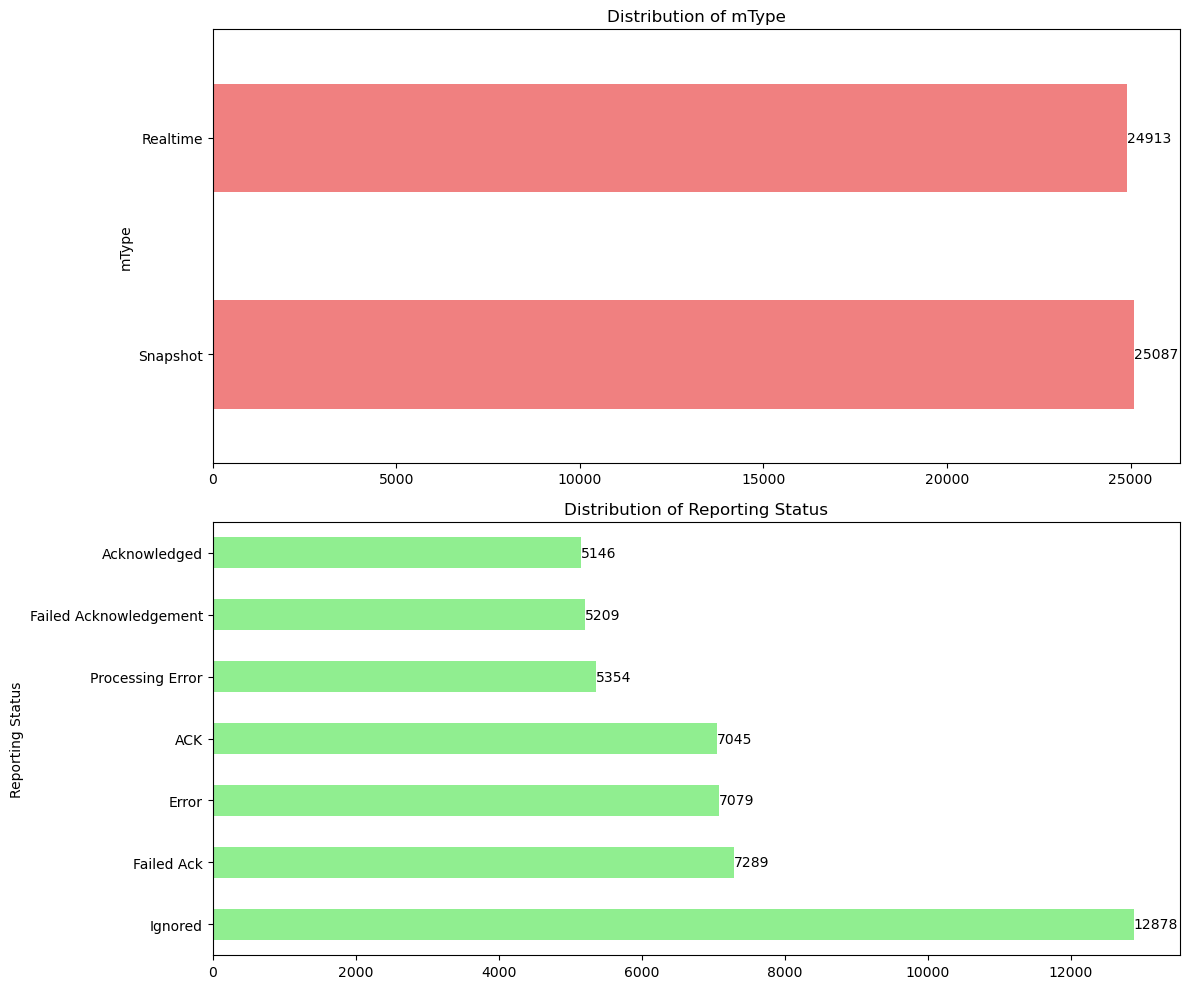

In [213]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))


ax=df['mType'].value_counts().plot(kind='barh', ax=axs[0], color='lightcoral')
axs[0].set_title('Distribution of mType')
for i in ax.containers:
    ax.bar_label(i)


ax1=df['Reporting Status'].value_counts().plot(kind='barh', ax=axs[1], color='lightgreen')
axs[1].set_title('Distribution of Reporting Status')
for i in ax1.containers:
    ax1.bar_label(i)


fig.tight_layout()


plt.show()

- According to my analysis Snapshot was widely used to capture of the current state of the market.
- As we can see most of the time the reporting status of a particular trade was intentionally being disregarded or not considered.

### Boxplot of Numerical Columns

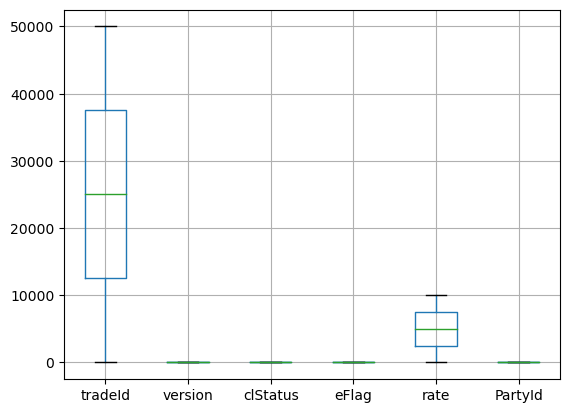

In [82]:
df.boxplot()
plt.show()

### Distribution Plot

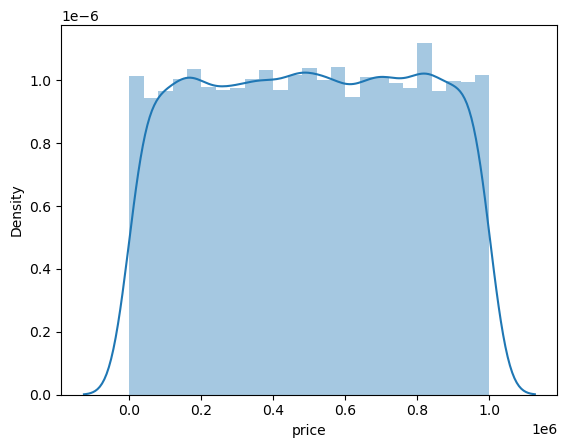

In [175]:
sns.distplot(df['price'])
plt.show()

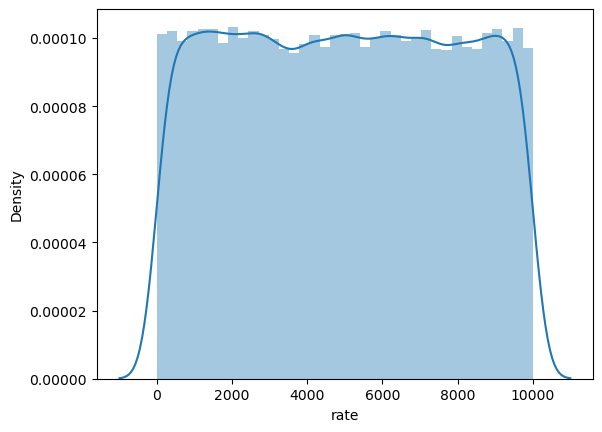

In [88]:
sns.distplot(df['rate'])
plt.show()

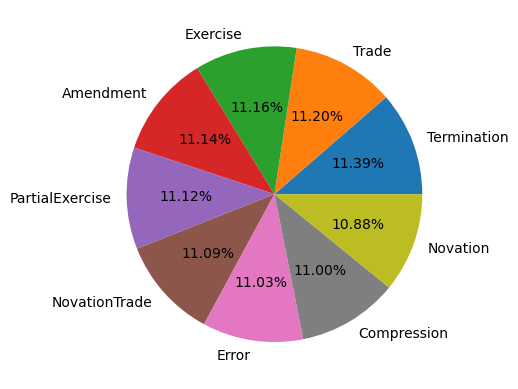

In [90]:
plt.pie(df.eventT.value_counts(),labels=df.eventT.value_counts().index,autopct='%.2f%%')
plt.show()

- As per my analysis most of the time termination occured as contract had expired,canceled,or reached a predefined condition.

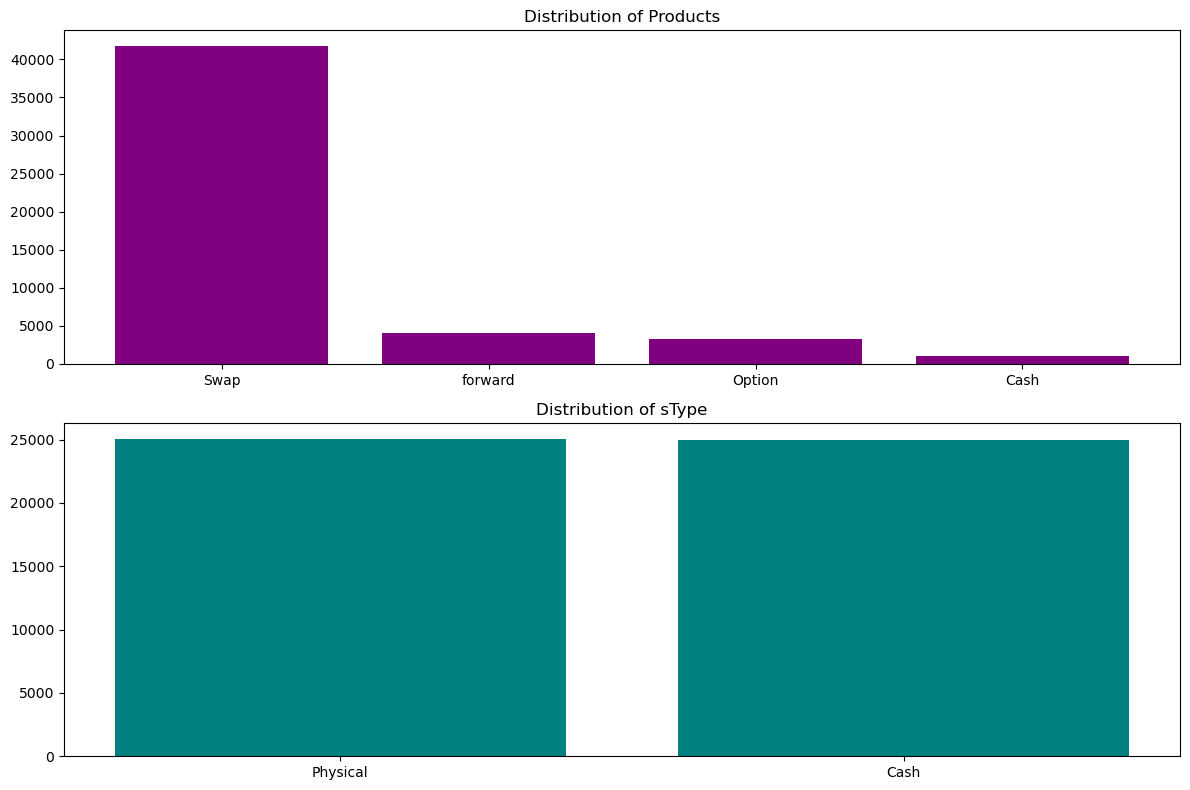

In [215]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].bar(df['Product'].value_counts().index, df['Product'].value_counts(), color='purple')
axs[0].set_title('Distribution of Products')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)


axs[1].bar(df['sType'].value_counts().index, df['sType'].value_counts(), color='teal')
axs[1].set_title('Distribution of sType')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)


fig.tight_layout()

plt.show()

- As we can see mostly Swap was used where two parties agree to exchange cash flows or other financial instruments over a specified period.
- As per my analysis most of the time trade involved the actual physical delivery of the underlying asset.

## Bivariate Analysis

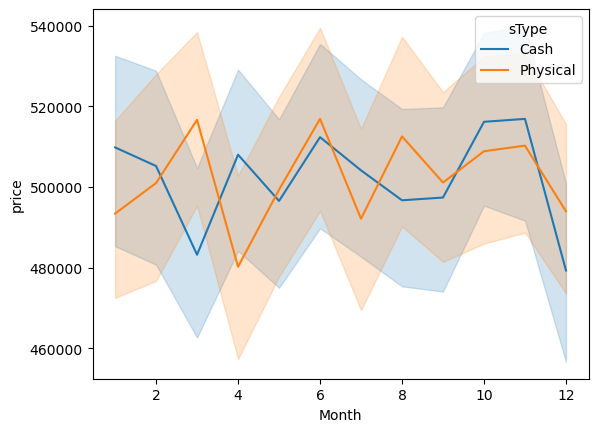

In [483]:
sns.lineplot(x='Month',y='price',data=df,markers=True,hue='sType')
plt.show()

- As per analysis we could see monthy trend in price of the traded asset and the settlement type.
- In the month of June and March the price seemed high and traded asset was settled through Physical delivery.

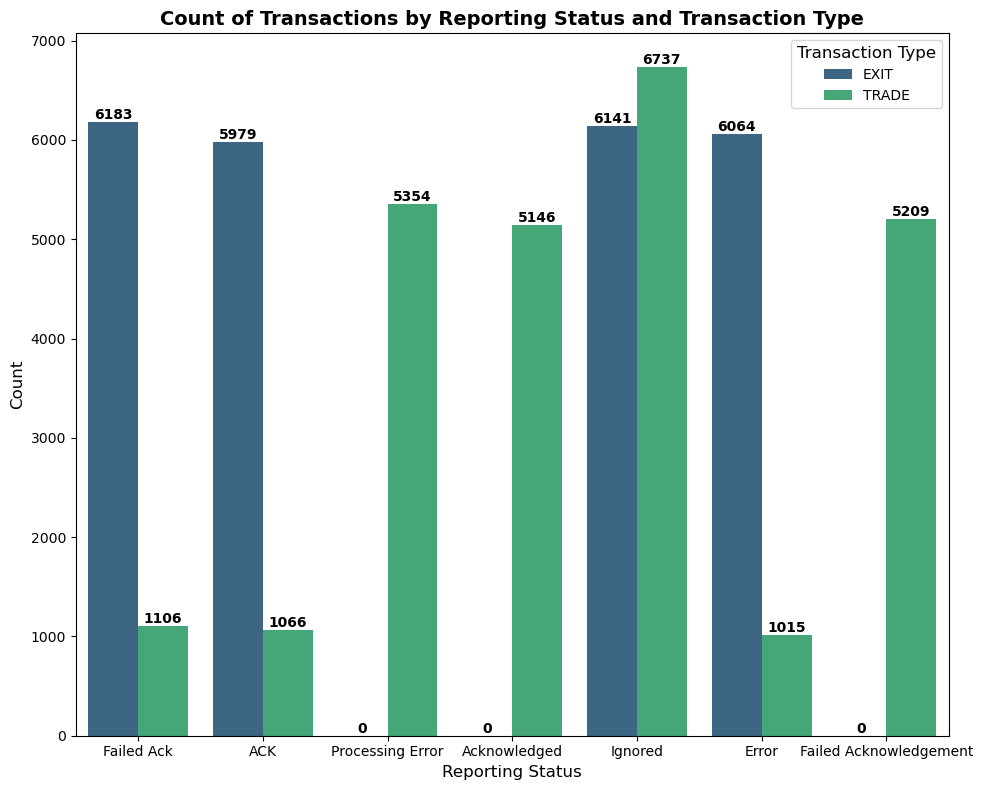

In [121]:
plt.figure(figsize=(10, 8))


ax = sns.countplot(x='Reporting Status', data=df, hue='transactionType', palette='viridis')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', color='black', fontsize=10, weight='bold')


plt.title('Count of Transactions by Reporting Status and Transaction Type', fontsize=14, weight='bold')


plt.xlabel('Reporting Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Transaction Type', title_fontsize='12', fontsize='10')


plt.tight_layout()


plt.show()

- As we can see most of the transactions were Ignored or not reported the traded transactions were ignored most of the time.
- The number of acknowledged traded transactions were quite low.

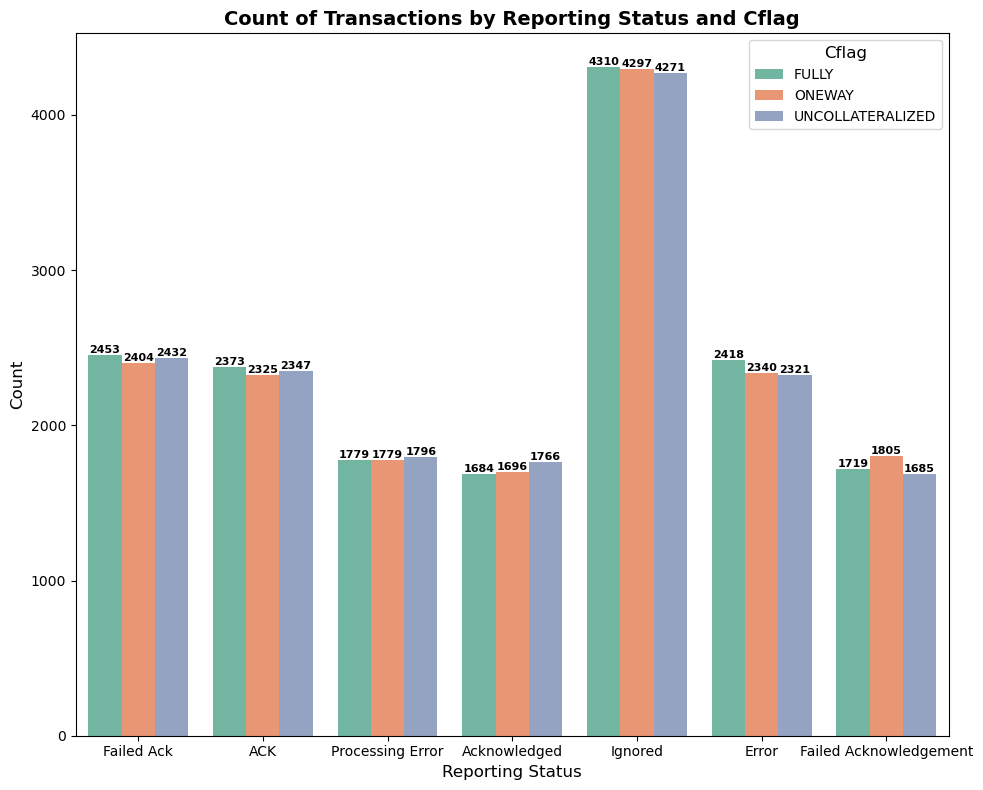

In [125]:
plt.figure(figsize=(10, 8))


ax = sns.countplot(x='Reporting Status', data=df, hue='cflag', palette='Set2')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, color='black', weight='bold')


plt.title('Count of Transactions by Reporting Status and Cflag', fontsize=14, weight='bold')


plt.xlabel('Reporting Status', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.legend(title='Cflag', title_fontsize='12', fontsize='10')

plt.tight_layout()

plt.show()

- From above we can interpret that most of the transactions that were fully cleared were not reported or ignored.
- The acknowledged transactions that were fully cleared were quite low.

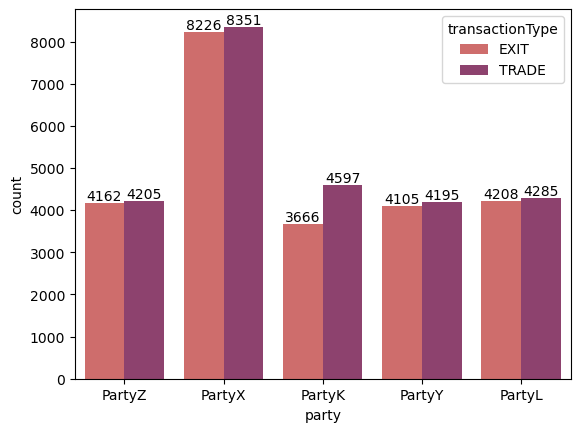

In [484]:
ax=sns.countplot(x='party',hue='transactionType',data=df,palette='flare')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- According to my analysis PartyX had higher number of transactions as they have traded more number of times than others.
- PartyZ had lower number of transactions that they have traded as compared to other parties.

# Summary Report

## Introduction

- This report presents a comprehensive analysis of trade data, focusing on key variables such as method, cflag, and their respective distributions. 
- The analysis aims to provide valuable insights into the patterns and characteristics of the trades.

## Data Overview

- The dataset contains information about trades, including attributes such as method, cflag, and others. 
- The analysis is based on 50000 rows and 26 columns.

## Key Findings

### 1. Distribution of Method

- The distribution of trade methods reveals that most of the financial transactions were conducted Electronically.
- Method Electronic was the most prevalent, representing 25.2% of all trades.

### 2. Distribution of Cflag

- The Cflag distribution illustrates that Fully had more weightage as compared to others.
- Cflag Fully was the most prevalent representing 33.5% and the least Cflag is Uncollateralized which is 33.2%.

### 3. Distribution of mType

- The distribution of mType reveals that Snapshot was widely used to capture of the current state of the market.
- Snapshot was the most prevalent, representing 50.1% of all other mType.

### 4. Distribution of Reporting Status

- Most of the time the reporting status of a particular trade was intentionally being disregarded or not considered.
- Ignored was the most prevalent, representing 25.7% of all other trade reporting status.

### 5. Distribution of Event Types

- Most of the time termination occured as contract had expired,canceled,or reached a predefined condition.
- Termination was the most prevalent, representing 11.39% of all other event types.

### 6. Distribution of Products

- The distribution of Products reveals that Swap was the most frequent way through which financial product was traded.
- Swap was the most prevalent, representing 83.4% of all other products.

### 7. Distribution of sType

- The distribution of sType reveals that Physical was widely used as a settlement method while trading.
- Physical was the most prevalent, representing 50.1% of all other sTypes.

### 8. Monthly Trend of Price of Asset with Settlement Type

- Monthy trend in price of the traded asset and the settlement type.
- In the month of June and March the price seemed high and traded asset was settled through Physical delivery.

### 9. Status of Transactions with Type of Transaction

- The transactions were Ignored or not reported the traded transactions were ignored most of the time.
- The number of acknowledged traded transactions were quite low.

### 10. Reporting Status of Transactions with Clearance Flag

- The transactions that were fully cleared were not reported or ignored.
- The acknowledged transactions that were fully cleared were quite low.

### 11. Transactions of Parties with Type of Transaction

- PartyX had higher number of transactions as they have traded more number of times than others.
- PartyZ had lower number of transactions that they have traded as compared to other parties.

## Conclusion

- In conclusion, this analysis offers valuable insights into the trade data, emphasizing key patterns and relationships among different variables. 
- The findings provide a foundation for informed decision-making and potential areas for further exploration.

## Handling Missing Data

In [489]:
df.isnull().sum()

tradeId                 0
regulator               0
version                 0
assetClass              0
clStatus                0
cflag                   0
eFlag                   0
cDateTime               0
method                  0
rate                    0
expirationDate          0
eventT                  0
mType                   0
Timestamp               0
quantity                0
seller                  0
endDate                 0
sType                   0
Product                 0
price               34986
terminationDate      6209
party                   0
PartyId                 0
transactionType         0
Reporting Status        0
Year                    0
Month                   0
dtype: int64

In [490]:
# As price column has approximately 70% missing values then we can drop that column

df= df.drop(columns=['price'])

In [491]:
# Column terminationDate has 12% missing values so we can drop the null values rows

df= df.dropna(subset=['terminationDate'])

In [492]:
df.isnull().sum()

tradeId             0
regulator           0
version             0
assetClass          0
clStatus            0
cflag               0
eFlag               0
cDateTime           0
method              0
rate                0
expirationDate      0
eventT              0
mType               0
Timestamp           0
quantity            0
seller              0
endDate             0
sType               0
Product             0
terminationDate     0
party               0
PartyId             0
transactionType     0
Reporting Status    0
Year                0
Month               0
dtype: int64

## Dropping Unnecessary Columns

In [493]:
df= df.drop(columns=['tradeId','regulator','assetClass','quantity'])

In [494]:
df1=df.copy()

In [495]:
df1= df1.drop(columns=['cDateTime','expirationDate','Timestamp','endDate','terminationDate'])

## Categorical Columns

- Categorical Features- cflag, method, eventT, mType, seller, sType, Product, party, transactionType, Reporting Status

# Encoding

### Label Encoding

In [496]:
df1['cflag']= df1['cflag'].astype('category')
df1['cflag']= df1['cflag'].cat.codes

In [497]:
df1['method']= df1['method'].astype('category')
df1['method']= df1['method'].cat.codes

In [498]:
df1['mType']= df1['mType'].astype('category')
df1['mType']= df1['mType'].cat.codes

In [499]:
df1['seller']= df1['seller'].astype('category')
df1['seller']= df1['seller'].cat.codes

In [500]:
df1['sType']= df1['sType'].astype('category')
df1['sType']= df1['sType'].cat.codes

In [501]:
df1['Product']= df1['Product'].astype('category')
df1['Product']= df1['Product'].cat.codes

In [502]:
df1['transactionType']= df1['transactionType'].astype('category')
df1['transactionType']= df1['transactionType'].cat.codes

In [503]:
df1['Reporting Status']= df1['Reporting Status'].astype('category')
df1['Reporting Status']= df1['Reporting Status'].cat.codes

### One Hot Encoder

In [504]:
df1= pd.get_dummies(columns=['eventT','party'],data=df1,drop_first=True,dtype='float')

In [505]:
df1.head()

,version,clStatus,cflag,eFlag,method,rate,mType,seller,sType,Product,...,eventT_Exercise,eventT_Novation,eventT_NovationTrade,eventT_PartialExercise,eventT_Termination,eventT_Trade,party_PartyL,party_PartyX,party_PartyY,party_PartyZ
0,1,1,0,0,2,3204.6267,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9,0,0,0,3,1061.6943,1,1,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,0,0,0,2,9338.9422,0,1,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,1,0,9303.3931,0,1,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,0,0,9684.7840,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [506]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43791 entries, 0 to 49998
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   version                 43791 non-null  int64  
 1   clStatus                43791 non-null  int32  
 2   cflag                   43791 non-null  int8   
 3   eFlag                   43791 non-null  int32  
 4   method                  43791 non-null  int8   
 5   rate                    43791 non-null  float64
 6   mType                   43791 non-null  int8   
 7   seller                  43791 non-null  int8   
 8   sType                   43791 non-null  int8   
 9   Product                 43791 non-null  int8   
 10  PartyId                 43791 non-null  int64  
 11  transactionType         43791 non-null  int8   
 12  Reporting Status        43791 non-null  int8   
 13  Year                    43791 non-null  int32  
 14  Month                   43791 non-null  int

# Check Correlation

In [507]:
df1.corr()

,version,clStatus,cflag,eFlag,method,rate,mType,seller,sType,Product,...,eventT_Exercise,eventT_Novation,eventT_NovationTrade,eventT_PartialExercise,eventT_Termination,eventT_Trade,party_PartyL,party_PartyX,party_PartyY,party_PartyZ
version,1.000000,-0.001173,0.005997,0.000336,0.002018,0.004245,-0.001017,-0.001676,-0.003134,-0.001804,...,0.003403,0.008141,0.003360,-0.000686,-0.009352,0.007715,0.008975,-0.002150,-0.011605,0.003505
clStatus,-0.001173,1.000000,-0.002000,-0.005795,-0.004011,-0.008206,-0.002442,0.003582,0.003017,-0.127855,...,-0.001324,0.001651,-0.004449,0.002750,0.004597,-0.007356,-0.036580,-0.036299,-0.026512,-0.040397
cflag,0.005997,-0.002000,1.000000,0.007271,-0.001212,0.002206,0.003079,-0.006424,0.000617,-0.002238,...,0.000909,0.003600,0.002698,0.002155,-0.007792,0.006124,0.001896,0.002887,-0.002458,-0.003041
eFlag,0.000336,-0.005795,0.007271,1.000000,-0.005210,-0.002711,0.003629,-0.010030,0.001620,-0.002037,...,0.003224,0.005318,0.000554,-0.005701,-0.005781,0.001552,-0.004886,0.005032,0.005639,-0.008141
method,0.002018,-0.004011,-0.001212,-0.005210,1.000000,-0.002514,-0.003026,0.004522,-0.005199,-0.002036,...,0.002272,-0.003630,-0.005715,-0.001750,0.000564,0.004778,0.005110,-0.006082,-0.003348,-0.001396
rate,0.004245,-0.008206,0.002206,-0.002711,-0.002514,1.000000,-0.007298,-0.003125,0.005739,0.004450,...,-0.002795,0.001798,-0.003620,0.001364,0.002937,-0.003796,-0.000505,-0.005563,0.004498,0.002173
mType,-0.001017,-0.002442,0.003079,0.003629,-0.003026,-0.007298,1.000000,-0.000818,0.004631,-0.010139,...,-0.000611,0.005118,-0.006951,0.000340,-0.009739,0.003354,0.004152,-0.002367,0.002246,0.002407
seller,-0.001676,0.003582,-0.006424,-0.010030,0.004522,-0.003125,-0.000818,1.000000,-0.001908,-0.004298,...,0.000405,0.004139,0.006080,-0.002987,-0.002451,-0.001420,-0.004265,0.009814,-0.001407,-0.005654
sType,-0.003134,0.003017,0.000617,0.001620,-0.005199,0.005739,0.004631,-0.001908,1.000000,-0.001504,...,0.005184,-0.004554,-0.002135,-0.002858,0.003906,-0.004147,0.003549,0.000056,0.008260,-0.008959
Product,-0.001804,-0.127855,-0.002238,-0.002037,-0.002036,0.004450,-0.010139,-0.004298,-0.001504,1.000000,...,-0.000242,0.001759,-0.003056,-0.001169,-0.004878,0.004611,0.023010,0.035875,0.022726,0.022874


## Splitting Data into Dependent and Independent Variables


In [508]:
x=df1.drop(columns=['Reporting Status'])
y=df1['Reporting Status']

In [509]:
x.head()

,version,clStatus,cflag,eFlag,method,rate,mType,seller,sType,Product,...,eventT_Exercise,eventT_Novation,eventT_NovationTrade,eventT_PartialExercise,eventT_Termination,eventT_Trade,party_PartyL,party_PartyX,party_PartyY,party_PartyZ
0,1,1,0,0,2,3204.6267,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9,0,0,0,3,1061.6943,1,1,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,0,0,0,2,9338.9422,0,1,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,1,0,9303.3931,0,1,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,0,0,9684.7840,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [510]:
y.head()

0    3
1    0
2    6
3    1
4    1
Name: Reporting Status, dtype: int8

# Feature Scaling

In [511]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)

In [512]:
x

array([[-1.54145902e+00,  9.32894034e-01, -1.22343136e+00, ...,
        -7.04020840e-01, -4.45981406e-01,  2.22774029e+00],
       [ 1.54583005e+00, -1.07193311e+00, -1.22343136e+00, ...,
         1.42041250e+00, -4.45981406e-01, -4.48885359e-01],
       [ 1.15991892e+00, -1.07193311e+00, -1.22343136e+00, ...,
         1.42041250e+00, -4.45981406e-01, -4.48885359e-01],
       ...,
       [-1.15554788e+00, -1.07193311e+00, -1.22343136e+00, ...,
         1.42041250e+00, -4.45981406e-01, -4.48885359e-01],
       [ 1.15991892e+00, -1.07193311e+00,  1.22555649e+00, ...,
        -7.04020840e-01, -4.45981406e-01,  2.22774029e+00],
       [-1.15554788e+00,  9.32894034e-01,  1.06256467e-03, ...,
        -7.04020840e-01, -4.45981406e-01, -4.48885359e-01]])

# Groups of Similar Transactions

In [426]:
def create_group_identifier(row):
    return f"{row['method']}_{row['cflag']}_{row['eventT']}_{row['Product']}"

# Apply the function to create a new column 'group_identifier'
df['group_identifier'] = df.apply(create_group_identifier, axis=1)

# Group the DataFrame by the 'group_identifier' column and count the number of groups
grouped_df = df.groupby('group_identifier').size().reset_index(name='group_count')

# Display the grouped DataFrame
grouped_data=pd.DataFrame(grouped_df)
grouped_data.head()

,group_identifier,group_count
0,Electronic_FULLY_Amendment_Cash,15
1,Electronic_FULLY_Amendment_Option,21
2,Electronic_FULLY_Amendment_Swap,360
3,Electronic_FULLY_Amendment_forward,36
4,Electronic_FULLY_Compression_Cash,9
